In [32]:
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def generate_erdos_renyi(node_num, edge_num):
    p = 2 * edge_num / (node_num * (node_num - 1))
    return nx.erdos_renyi_graph(node_num, p)

def generate_barabasi_albert(node_num, edge_num):
    m_parameter = max(1, edge_num // node_num)
    return nx.barabasi_albert_graph(node_num, m_parameter)

In [34]:
def plot_networks_spring(graphs, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (graph, title) in enumerate(zip(graphs, titles)):
        ax = axes[i]
        nx.draw_spring(graph, node_size=50, width=0.3, edge_color="gray", ax=ax)
        ax.set_title(title)
    plt.show()

In [35]:
def plot_networks_circular(graphs, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (graph, title) in enumerate(zip(graphs, titles)):
        ax = axes[i]
        nx.draw_circular(graph, node_size=50, width=0.3, edge_color="gray", ax=ax)
        ax.set_title(title)
    plt.show()

In [36]:
mtx_file = "./socfb-Caltech36/socfb-Caltech36.mtx"

matrix = scipy.io.mmread(mtx_file)  # Load matrix
graph = nx.from_scipy_sparse_array(matrix)

node_num = graph.number_of_nodes()
edge_num = graph.number_of_edges()

erdos_nw = generate_erdos_renyi(node_num, edge_num)
barabasi_nw = generate_barabasi_albert(node_num, edge_num)

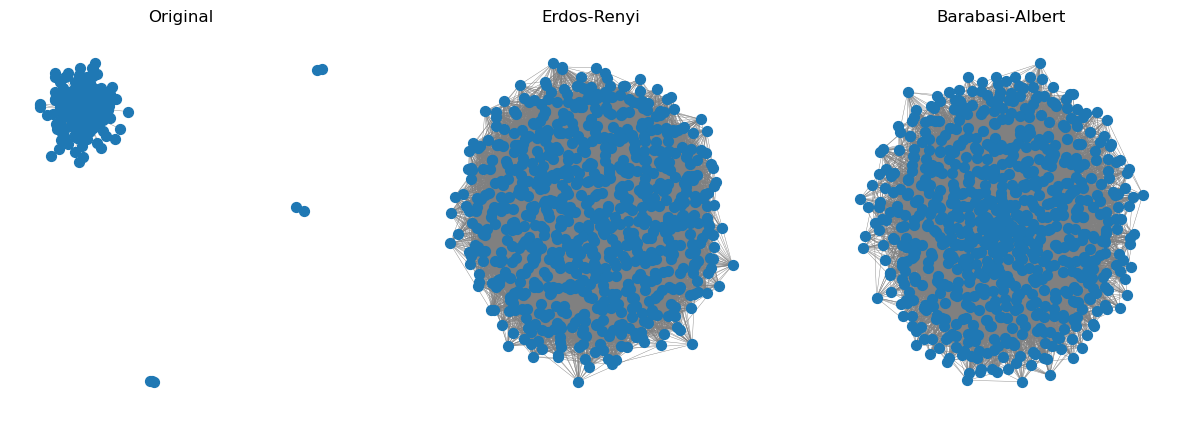

In [37]:
plot_networks_spring([graph, erdos_nw, barabasi_nw], 
                  ["Original", "Erdos-Renyi", "Barabasi-Albert"])

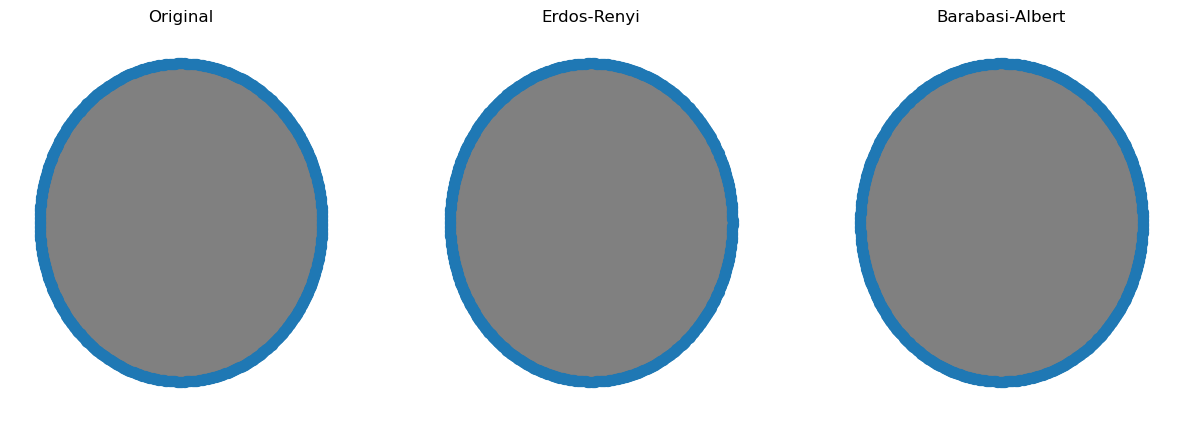

In [38]:
plot_networks_circular([graph, erdos_nw, barabasi_nw], 
                  ["Original", "Erdos-Renyi", "Barabasi-Albert"])

In [39]:
print(f"Original nw -- nodes: {graph.number_of_nodes()} -- edges: {graph.number_of_edges()}")
print(f"Erdos-Renyi Random nw -- nodes: {erdos_nw.number_of_nodes()} -- edges: {erdos_nw.number_of_edges()}")
print(f"Barabasi-Albert Scale-free nw -- nodes: {barabasi_nw.number_of_nodes()} -- edges: {barabasi_nw.number_of_edges()}")

Original nw -- nodes: 769 -- edges: 16656
Erdos-Renyi Random nw -- nodes: 769 -- edges: 16647
Barabasi-Albert Scale-free nw -- nodes: 769 -- edges: 15708


In [40]:
nx.write_gml(erdos_nw, f"erdos_renyi_random.gml")
nx.write_gml(barabasi_nw, f"barabasi_scale_free.gml")